In [1]:
import torch

In [2]:
y = torch.tensor([[[1, 2, 3],
                   [4, 5, 6]],
                  [[1, 2, 3],
                   [4, 5, 6]]])

In [7]:
y[:, :, 2:3]

tensor([[[3],
         [6]],

        [[3],
         [6]]])

In [ ]:
y = torch.tensor([[[1],
                   [4]],
                  [[1],
                   [4]]])

# Antecedents

## 1. Imports

In [2]:
import torch

from antecedents.main import *
from antecedents.functions import *

In [5]:
data = torch.vstack(
        [
            torch.linspace(1., 3., 1000),
            torch.linspace(4., 6., 1000),
            torch.linspace(7., 9., 1000)
        ]).T.unsqueeze(0)

## 2. Function

In [22]:
input = torch.tensor([[0,1,2,3,4,5,6,7,8,9,10]], dtype=torch.float32)

sigmoid = Gauss(mean = 5., std = 2.5)

sigmoid(input)

tensor([[0.1353, 0.2780, 0.4868, 0.7261, 0.9231, 1.0000, 0.9231, 0.7261, 0.4868,
         0.2780, 0.1353]], grad_fn=<ExpBackward0>)

In [9]:
data[:, :, 0].shape

torch.Size([1, 1000])

In [12]:
gauss(data[:, :, 0]).shape

torch.Size([1, 1000])

In [11]:
gauss = Gauss(mean=2., std=0.5)

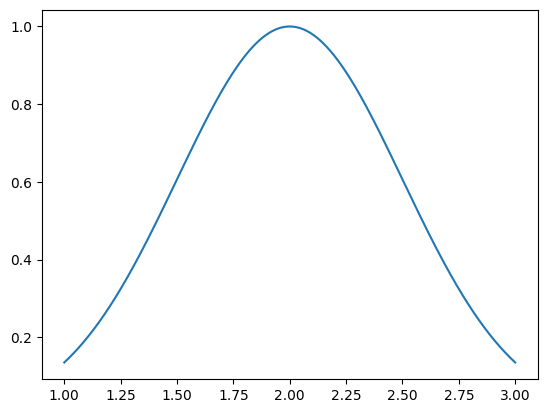

In [4]:
plt.plot(data[:, :, 0][0].detach().numpy(), gauss(data[:, :, 0])[0].detach().numpy())
plt.show()

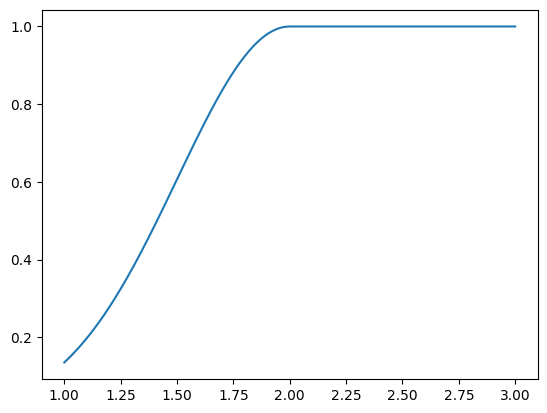

In [5]:
heaviside_1 = Heaviside(left_equation=gauss)

plt.plot(data[:, :, 0][0].detach().numpy(), heaviside_1(data[:, :, 0])[0].detach().numpy())
plt.show()

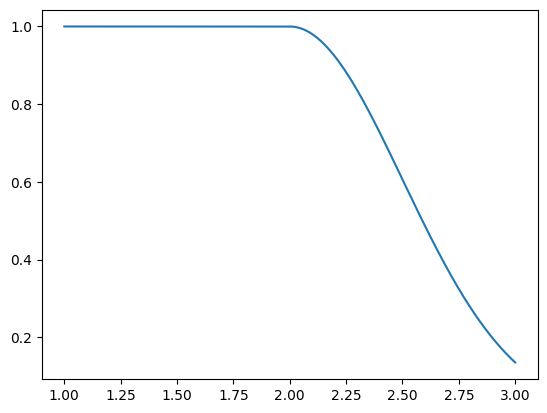

In [6]:
heaviside_2 = Heaviside(right_equation=gauss)

plt.plot(data[:, :, 0][0].detach().numpy(), heaviside_2(data[:, :, 0])[0].detach().numpy())
plt.show()

In [7]:
# Create input data and target
x = torch.tensor([[1.0]])
target = torch.tensor([[2.0]])

# Perform a forward pass
output = gauss(x)

# Compute the loss
loss = torch.nn.MSELoss()(output, target)

# Perform backpropagation
loss.backward()

# Check if gradients are None or have values
for param in gauss.parameters():
    print(param.grad is not None)

True
True


## 3. Universe

In [7]:
univ = Universe(name='STOP', data=(torch.min(data[:, :, 0]), torch.max(data[:, :, 0])) , merge=False, heaviside=True, divisions=10)
print(univ.__doc__)

Applies a linear transformation to the incoming data: :math:`y = xA^T + b`

    This module supports :ref:`TensorFloat32<tf32_on_ampere>`.

    On certain ROCm devices, when using float16 inputs this module will use :ref:`different precision<fp16_on_mi200>` for backward.

    Args:
        in_features: size of each input sample
        out_features: size of each output sample
        bias: If set to ``False``, the layer will not learn an additive bias.
            Default: ``True``

    Shape:
        - Input: :math:`(*, H_{in})` where :math:`*` means any number of
          dimensions including none and :math:`H_{in} = \text{in\_features}`.
        - Output: :math:`(*, H_{out})` where all but the last dimension
          are the same shape as the input and :math:`H_{out} = \text{out\_features}`.

    Attributes:
        weight: the learnable weights of the module of shape
            :math:`(\text{out\_features}, \text{in\_features})`. The values are
            initialized from :math

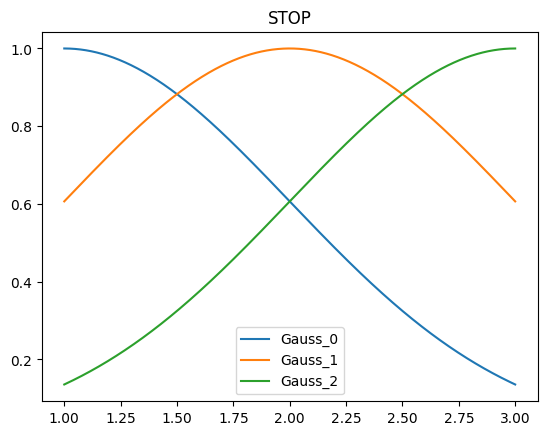

In [8]:
universe = Universe(name='STOP', data=(torch.min(data[:, :, 0]), torch.max(data[:, :, 0])) , merge=False, heaviside=True, divisions=10)

universe.automf(n_func=3)

universe.display()

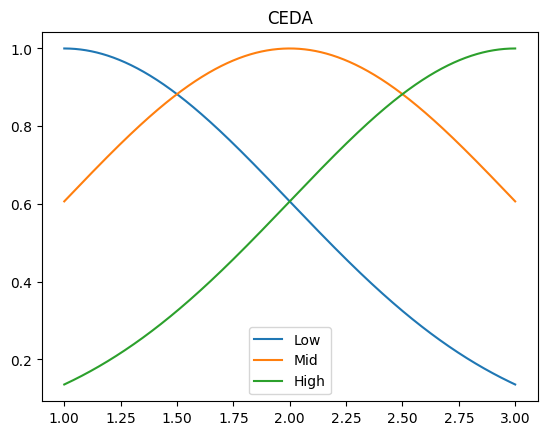

In [9]:
universe.name = 'CEDA'

universe.rename(old_names=['Gauss_0', 'Gauss_1', 'Gauss_2'], new_names=['Low', 'Mid', 'High'])

universe.display()

In [10]:
universe.universe

{'Low': Gauss(), 'Mid': Gauss(), 'High': Gauss()}

In [11]:
# Create input data and target
x = torch.tensor([[1.0]])
target = torch.tensor([[2.0, 2.0, 2.0]]).unsqueeze(0)

# Perform a forward pass
output = universe(x.unsqueeze(0))

# Compute the loss
loss = torch.nn.MSELoss()(output, target)

# Perform backpropagation
loss.backward()

# Check if gradients are None or have values
for key, function in universe.universe.items():
    for param in function.parameters():
        print(param.grad is not None)

True
True
True
True
True
True


## 4. Antecedents

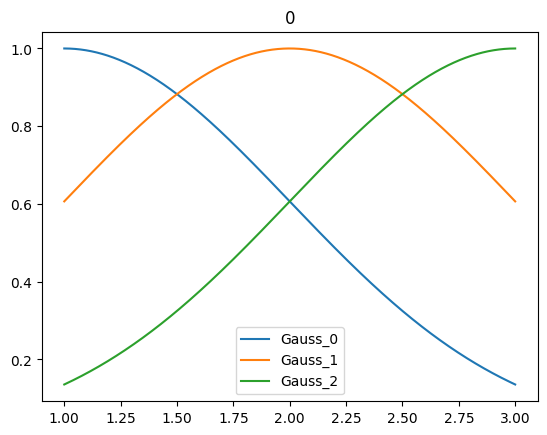

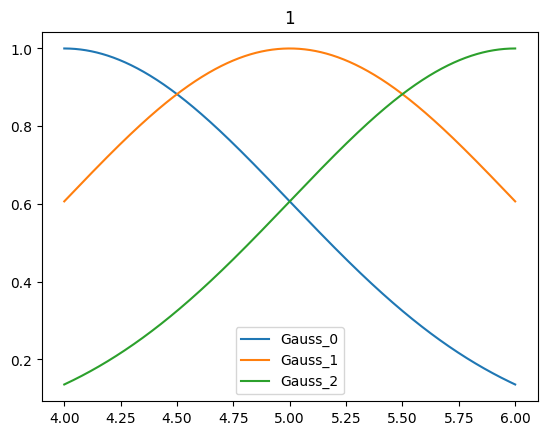

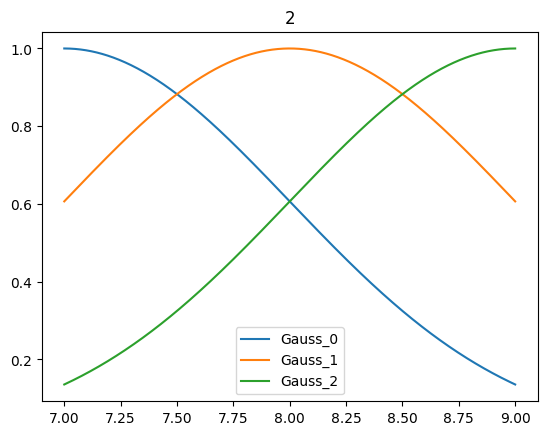

In [12]:
antecedents = Antecedents(data=data)

antecedents.automf(3)

antecedents.display(['0','1','2'])

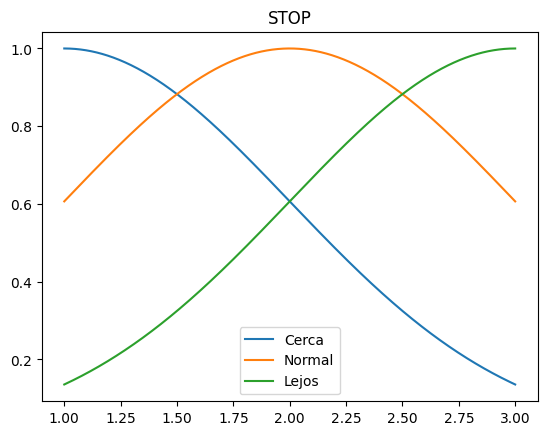

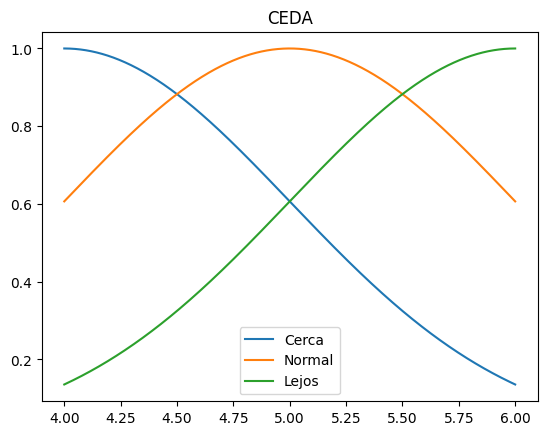

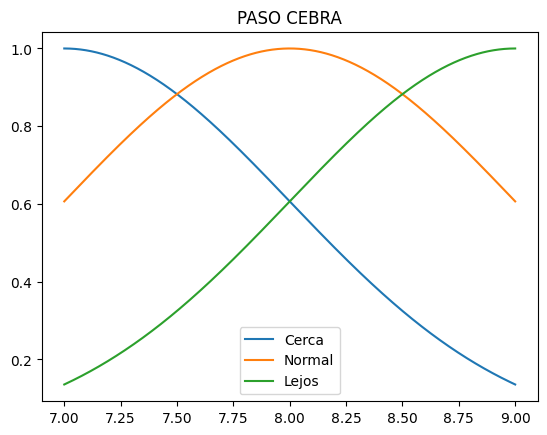

In [13]:
antecedents.rename(old_names=['0', '1', '2'], new_names=['STOP', 'CEDA', 'PASO CEBRA'])

for key in antecedents.universes.keys():
    antecedents.universes[key].rename(old_names=['Gauss_0', 'Gauss_1', 'Gauss_2'], new_names=['Cerca', 'Normal', 'Lejos'])


antecedents.display(['STOP', 'CEDA', 'PASO CEBRA'])

In [14]:
# Create input data and target
x = data

# Perform a forward pass
output = antecedents(x)

# Compute the loss
loss = torch.nn.MSELoss()(output, output + torch.tensor([1.]))

# Perform backpropagation
loss.backward()

# Check if gradients are None or have values
for _, universe in antecedents.universes.items():
    print(universe)  
    for _, function in universe.universe.items():
        for param in function.parameters():
            print(param.grad is not None)

Universe()
True
True
True
True
True
True
Universe()
True
True
True
True
True
True
Universe()
True
True
True
True
True
True


# Rules

## 1. Imports

In [15]:
import torch

from Rules.intersection_algorithms import *
from Rules.relation_algorithms import *
from Rules.rules import *

In [16]:
data = torch.rand(2, 4, 3)
print(data)

tensor([[[0.7149, 0.5774, 0.2062],
         [0.7333, 0.6792, 0.4530],
         [0.8800, 0.9311, 0.4275],
         [0.7939, 0.1083, 0.3309]],

        [[0.2298, 0.4436, 0.2514],
         [0.9062, 0.5521, 0.5814],
         [0.7208, 0.7003, 0.5194],
         [0.5098, 0.9807, 0.9045]]])


## 2. How to go from a fuzzy input into a binary one

In [17]:
fuzzyfied_input = binarize_input(data)

In [18]:
fuzzyfied_input

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        [1., 0., 0.],
        [0., 0., 0.],
        [1., 0., 0.],
        [1., 1., 0.],
        [0., 1., 1.]])

## 3. What do Apriori output?

In [19]:
current_rules = apriori(data)

In [20]:
current_rules

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [1., 1., 0.]])

## 4. How to relate the rules outputed by the Apriori

In [21]:
rules = Rules()

In [22]:
rules.current_rules = current_rules

In [23]:
data

tensor([[[0.7149, 0.5774, 0.2062],
         [0.7333, 0.6792, 0.4530],
         [0.8800, 0.9311, 0.4275],
         [0.7939, 0.1083, 0.3309]],

        [[0.2298, 0.4436, 0.2514],
         [0.9062, 0.5521, 0.5814],
         [0.7208, 0.7003, 0.5194],
         [0.5098, 0.9807, 0.9045]]])

In [24]:
current_rules

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [1., 1., 0.]])

In [25]:
rules(data)

tensor([[[0.7149, 0.5774, 0.5774],
         [0.7333, 0.6792, 0.6792],
         [0.8800, 0.9311, 0.8800],
         [0.7939, 0.1083, 0.1083]],

        [[0.2298, 0.4436, 0.2298],
         [0.9062, 0.5521, 0.5521],
         [0.7208, 0.7003, 0.7003],
         [0.5098, 0.9807, 0.5098]]])

# Consequents

## 1. Imports

In [1]:
import torch

from Consequents.algorithms import *
from Consequents.consequents import *

ModuleNotFoundError: No module named 'torch'

In [27]:
data = torch.vstack(
        [
            torch.linspace(1., 4., 4),
            torch.linspace(5., 8., 4),
            torch.linspace(9., 12., 4),
            
        ]).T.unsqueeze(0)

y = torch.sum(data[0], axis=1).unsqueeze(0).unsqueeze(-1)
print(data)
print(y)

tensor([[[ 1.,  5.,  9.],
         [ 2.,  6., 10.],
         [ 3.,  7., 11.],
         [ 4.,  8., 12.]]])
tensor([[[15.],
         [18.],
         [21.],
         [24.]]])


In [28]:
rlse = Consequents(algorithms=[RecursiveLSE(3),RecursiveLSE(3),RecursiveLSE(3)], outputs=['ACELERADOR', 'FRENO', 'VOLANTE'])

In [29]:
import pprint

pprint.PrettyPrinter(depth=4).pprint(rlse.params)

{'ACELERADOR': {'S': tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
                'lambda': tensor([0.9427]),
                'theta': {}},
 'FRENO': {'S': tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
           'lambda': tensor([0.6225]),
           'theta': {}},
 'VOLANTE': {'S': tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
             'lambda': tensor([0.9528]),
             'theta': {}}}


In [30]:
rlse.params

{'ACELERADOR': {'theta': {},
  'S': tensor([[1., 0., 0.],
          [0., 1., 0.],
          [0., 0., 1.]]),
  'lambda': tensor([0.9427])},
 'FRENO': {'theta': {},
  'S': tensor([[1., 0., 0.],
          [0., 1., 0.],
          [0., 0., 1.]]),
  'lambda': tensor([0.6225])},
 'VOLANTE': {'theta': {},
  'S': tensor([[1., 0., 0.],
          [0., 1., 0.],
          [0., 0., 1.]]),
  'lambda': tensor([0.9528])}}

In [31]:
rlse.active_rules = current_rules

In [32]:
pprint.PrettyPrinter(depth=4).pprint(rlse.params)

{'ACELERADOR': {'S': tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
                'lambda': tensor([0.9427]),
                'theta': {'010': tensor([0., 0., 0.]),
                          '100': tensor([0., 0., 0.]),
                          '110': tensor([0., 0., 0.])}},
 'FRENO': {'S': tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
           'lambda': tensor([0.6225]),
           'theta': {'010': tensor([0., 0., 0.]),
                     '100': tensor([0., 0., 0.]),
                     '110': tensor([0., 0., 0.])}},
 'VOLANTE': {'S': tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
             'lambda': tensor([0.9528]),
             'theta': {'010': tensor([0., 0., 0.]),
                       '100': tensor([0., 0., 0.]),
                       '110': tensor([0., 0., 0.])}}}


In [34]:
rlse(data, y, current_rules)

True
tensor([[[ 30.,  70., 110.],
         [ 70., 174., 278.],
         [110., 278., 446.]]])
tensor([[[ 31.,  71., 111.],
         [ 71., 175., 279.],
         [111., 279., 447.]]])
tensor([[[ 1., -4.,  2.],
         [ 0.,  1.,  0.],
         [ 0.,  0.,  1.]]])


RuntimeError: einsum(): the number of subscripts in the equation (2) does not match the number of dimensions (3) for operand 0 and no ellipsis was given